In [2]:
%matplotlib inline
import tensorflow as tf
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [20]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [21]:
labels = train.label
train = train.drop('label', axis=1)
feats = train.as_matrix()
train.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 784 columns]

In [22]:
# nice viz with tsne
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
choose = np.random.choice(np.arange(len(train.as_matrix())), 100, replace=False)
a = tsne.fit_transform(train.as_matrix()[choose])

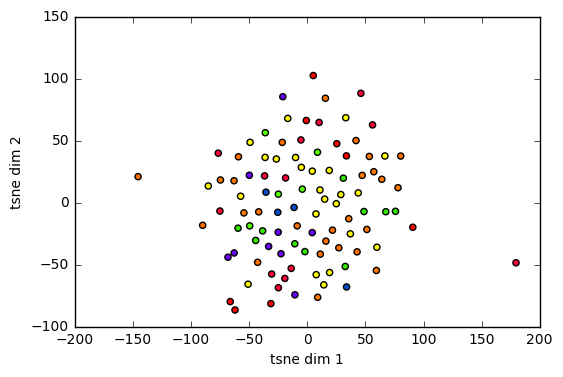

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(a[:,0], a[:,1], c = labels[choose] ,cmap=plt.cm.prism)
ax.set_xlabel("tsne dim 1")
ax.set_ylabel("tsne dim 2")

In [13]:
# one hot encode labels
labels = pd.get_dummies(labels).values
labels

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [6]:
sess = tf.InteractiveSession() #allows you to evaluate parts of the graph before building the whole thing up

In [7]:
#inputs to the graph
x = tf.placeholder(tf.float32, shape=[None, 784]) #trainning feats
y_ = tf.placeholder(tf.float32, shape=[None, 10]) #trainning labels

In [8]:
#weighst and bias for each pixel
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [9]:
sess.run(tf.global_variables_initializer())
y = tf.matmul(x, W)+b #prediction rule

In [9]:
#loss function
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

In [10]:
#uses Gradient descent w a learning rate of 0.5 to update W and b based on the value of the loss function
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [11]:
#run stochastic gradientbdescent 
for _ in range(1000):
  batch = np.random.randint(0, len(feats), 100)
  train_step.run(feed_dict={x: feats[batch], y_: labels[batch]})

In [12]:
#argmax will undo the one hot encoding
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [13]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [14]:
print(accuracy.eval(feed_dict={x: feats, y_: labels}))

0.895143


## Feedforward NN

In [15]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [16]:
learning_rate = 0.001
training_epochs = 150 #how many iterations over your data
batch_size = 200
display_step = 1

In [17]:
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [18]:
def mlp(x, weights, biases):
    """
    x: placeholder that takes in the input data
    weights: dictionary of variable weights {'11':__tensor__, 'l2':__tensor__}
    biases: dictionary of variable biases {'11':__tensor__, 'l2':__tensor__}
    Note that everything is fully connected.
    x is a matrix of dimension [42000, 784]
    weight is a matrix of dimension [nodes_in_prev_layer, nodes_in_next_layer]
    e.g. if there was no hidden layer, that would give [784, 10] 
    """
    #Activations for hidden layer 1(ReLu)
    x1 = tf.add(tf.matmul(x, weights['l1']), biases['l1'])
    x1 = tf.nn.relu(x1)
    #Activations for hidden layer 2(ReLu)
    x2 = tf.add(tf.matmul(x1, weights['l2']), biases['l2'])
    x2 = tf.nn.relu(x2)
    #output layer
    y_ = tf.matmul(x2, weights['out']) + biases['out']
    return y_

In [19]:
weights = {
    'l1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'l2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'l1': tf.Variable(tf.random_normal([n_hidden_1])),
    'l2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [20]:
model = mlp(x, weights, biases)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=y))
train_step = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [21]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

In [22]:
sess.run([init])
# Training cycle
for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(len(feats)/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch = np.random.randint(0, len(feats), batch_size)
            batch_x, batch_y = feats[batch], labels[batch]
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                          y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(avg_cost))
print("Optimization Finished!")

# Test model
correct_prediction = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print("Accuracy:", accuracy.eval({x: feats, y: labels}))

Epoch: 0001 cost= 77875.515332031
Epoch: 0002 cost= 16877.718622117
Epoch: 0003 cost= 10926.551088170
Epoch: 0004 cost= 7916.559041922
Epoch: 0005 cost= 5908.641657947
Epoch: 0006 cost= 4755.957473028
Epoch: 0007 cost= 3849.976185535
Epoch: 0008 cost= 3131.219756208
Epoch: 0009 cost= 2495.652059719
Epoch: 0010 cost= 2195.171349298
Epoch: 0011 cost= 1726.863815853


KeyboardInterrupt: 

In [44]:
# Test model
correct_prediction = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print("Accuracy:", accuracy.eval({x: feats, y: labels}))

Accuracy: 0.999381


In [57]:
sess.run(tf.nn.softmax(model), feed_dict={x:feats})[0]

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [68]:
test = pd.read_csv("data/test.csv").as_matrix()

In [72]:
preds = sess.run([tf.nn.softmax(model)], feed_dict={x:test})[0]

In [73]:
preds = [np.argmax(i) for i in preds]

In [82]:
answer = pd.DataFrame.from_dict(data={"ImageId":np.arange(1,len(preds)+1), "Label":preds}, orient='columns')
answer.to_csv("predictions/tf1.csv", index=False)

**Checkpoint reached**
Got a 96% with a simple 2 layer neural net. It took a lot of trainning admittedly. And it also seems like it is overfitting.

## Version 2

In [206]:
input_placeholder = tf.placeholder(shape=(None, 784), dtype=tf.float32) #unknown #of rows but 784 feats we know
label_placeholder = tf.placeholder(shape=(None, 10), dtype=tf.float32) #labels are 1-hot encoded

In [220]:
#Layer 1
no_nodes1 = 512
weights1 = tf.Variable(initial_value=tf.truncated_normal(shape = (784, no_nodes1), stddev=0.1), dtype=tf.float32)
biases1 = tf.Variable(initial_value=tf.zeros(shape = (no_nodes1)), dtype = tf.float32)
output1 = tf.add(tf.matmul(input_placeholder, weights1), biases1)
output1 = tf.nn.relu(output1)
#Layer 2
no_nodes2 = 512
weights2 = tf.Variable(initial_value=tf.truncated_normal(shape = (no_nodes1, no_nodes2), stddev=0.1), dtype=tf.float32)
biases2 = tf.Variable(initial_value=tf.zeros(shape = (no_nodes2)), dtype = tf.float32)
output2 = tf.add(tf.matmul(output1, weights2), biases2)
output2 = tf.nn.relu(output2)
#Layer 3
no_nodes3 = 512
weights3 = tf.Variable(initial_value=tf.truncated_normal(shape = (no_nodes2, no_nodes3), stddev=0.1), dtype=tf.float32)
biases3 = tf.Variable(initial_value=tf.zeros(shape = (no_nodes3)), dtype = tf.float32)
output3 = tf.add(tf.matmul(output2, weights3), biases3)
output3 = tf.nn.relu(output3)
# Output Layer
no_classes = 10
weights_out = tf.Variable(initial_value=tf.truncated_normal(shape = (no_nodes3, no_classes), stddev=0.1), dtype=tf.float32)
biases_out = tf.Variable(initial_value=tf.zeros(shape = (no_classes)), dtype = tf.float32)
model = tf.add(tf.matmul(output3, weights_out), biases_out)

In [221]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=label_placeholder))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

In [222]:
nepochs = 150
init = tf.global_variables_initializer()
sess.run(init)
for i in range(nepochs):
    _, c =  sess.run([optimizer, cost], feed_dict={input_placeholder:feats, label_placeholder:labels})
    print("# Epoch:{}".format(i))
    print("Loss:{}".format(c))
    print("Accuracy:{}".format(sum(sess.run([tf.argmax(model,1)], feed_dict={input_placeholder:feats})[0] == np.array([np.argmax(i) for i in labels]))\
/len(labels)))

# Epoch:0
Loss:557.4600219726562
Accuracy:0.30414285714285716
# Epoch:1
Loss:512.1281127929688
Accuracy:0.38902380952380955
# Epoch:2
Loss:513.7936401367188
Accuracy:0.5144285714285715
# Epoch:3
Loss:318.0520324707031
Accuracy:0.6136428571428572
# Epoch:4
Loss:220.8585205078125
Accuracy:0.6518571428571428
# Epoch:5
Loss:171.615966796875
Accuracy:0.6749285714285714
# Epoch:6
Loss:124.03250885009766
Accuracy:0.717452380952381
# Epoch:7
Loss:86.75979614257812
Accuracy:0.6746190476190477
# Epoch:8
Loss:100.25664520263672
Accuracy:0.6842142857142857
# Epoch:9
Loss:97.19975280761719
Accuracy:0.7672857142857142
# Epoch:10
Loss:60.437416076660156
Accuracy:0.8086904761904762
# Epoch:11
Loss:46.20412063598633
Accuracy:0.8172857142857143
# Epoch:12
Loss:45.48539733886719
Accuracy:0.8234523809523809
# Epoch:13
Loss:45.10470199584961
Accuracy:0.8276428571428571
# Epoch:14
Loss:45.61818313598633
Accuracy:0.8277142857142857
# Epoch:15
Loss:46.94857406616211
Accuracy:0.8296190476190476
# Epoch:16
Loss

In [226]:
preds = sess.run([tf.nn.softmax(model)], feed_dict={input_placeholder:test})[0]
preds = [np.argmax(i) for i in preds]
answer = pd.DataFrame.from_dict(data={"ImageId":np.arange(1,len(preds)+1), "Label":preds}, orient='columns')
answer.to_csv("predictions/tf2.csv", index=False)

Checkpoint, overfits like crazy. Version 1 was more successful. Next I should try a CNN with cleverhans

## Version 3

It's time for a CNN to do the work with Keras.

In [14]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPool2D, BatchNormalization

Using TensorFlow backend.


In [15]:
batch_size = 32
num_classes = 10
epochs = 15
data_augmentation = True

In [16]:
x_train = feats.reshape([42000, 28, 28])

In [17]:
model = Sequential()

# add a convolutional layer
#using 16 filters/kernels that add quite a bit of depth to the system
# relu activation to avoid saturation

model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))

# add a normalization layer
model.add(BatchNormalization())

# add a convolutional layer
                                                        
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu'))

# add a pooling layer
# keeping the maximum of 4 by 4 windows 
model.add(MaxPool2D(strides=(2,2)))

# add a normalization layer
model.add(BatchNormalization())

# add a dropout layer, mostly used for regularization here
model.add(Dropout(0.25))


# add a convolutional layer
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))

# add a normalization layer
model.add(BatchNormalization())

# add a convolutional layer
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))

# add a pooling layer
model.add(MaxPool2D(strides=(2,2))) #reduces size of input volume

# add a normalization layer
model.add(BatchNormalization())

# add a dropout layer
model.add(Dropout(0.25)) #regularization

# add a flatten layer
model.add(Flatten())

# add a dense layer (fully connected)
model.add(Dense(512,activation='relu'))

# add a dropout layer
model.add(Dropout(0.25))

# add a dense layer (fully connected)
model.add(Dense(1024,activation='relu'))

# add a dropout layer
model.add(Dropout(0.5))

# add a dense layer (output layer, 10 categories)
model.add(Dense(10,activation='softmax')) #typical softmax layer

In [42]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=3e-5),metrics=["accuracy"])

In [43]:
#takes super long to train, defs needs a gpu
model.fit(x_train.reshape(42000,28,28,1), labels,
              batch_size=batch_size,
              epochs=epochs,
              shuffle=True)

Epoch 1/15
42000/42000 [==============================] - 167s - loss: 1.0277 - acc: 0.6580   
Epoch 2/15
42000/42000 [==============================] - 158s - loss: 0.3460 - acc: 0.8905   
Epoch 3/15
42000/42000 [==============================] - 152s - loss: 0.2269 - acc: 0.9277   
Epoch 4/15
42000/42000 [==============================] - 184s - loss: 0.1748 - acc: 0.9439   
Epoch 5/15
42000/42000 [==============================] - 154s - loss: 0.1425 - acc: 0.9535   
Epoch 6/15
42000/42000 [==============================] - 153s - loss: 0.1235 - acc: 0.9608   
Epoch 7/15
42000/42000 [==============================] - 173s - loss: 0.1065 - acc: 0.9653   
Epoch 8/15
42000/42000 [==============================] - 160s - loss: 0.0941 - acc: 0.9693   
Epoch 9/15
42000/42000 [==============================] - 147s - loss: 0.0874 - acc: 0.9710   
Epoch 10/15
42000/42000 [==============================] - 173s - loss: 0.0794 - acc: 0.9743   
Epoch 11/15
42000/42000 [========================

In [44]:
#save model so that you don't have to train it every time

# serialize model to JSON
model_json = model.to_json()
with open("models/cnn.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("models/cnn.h5")
print("Saved model to disk")

Saved model to disk


In [310]:
preds = model.predict_classes(test.reshape(28000, 28,28,1))

27968/28000 [============================>.] - ETA: 0s

In [312]:
answer = pd.DataFrame.from_dict(data={"ImageId":np.arange(1,len(preds)+1), "Label":preds}, orient='columns')
answer.to_csv("predictions/tf3.csv", index=False)

Checkpoint 99% on the leaderboard and #342

## Fun experiment: How would a KNN classifier work in this scenario?

Define some notion of distance between the images... Impelement!

Manhattan, L1 distance!

Define the Manhattan distance as follows: Subtract the values of corresponding pixels from images. Add the absolute differences.

In [374]:
class NearestNeigbhbor:
    def __init__(self):
        pass
    
    def train(self, X,y) :
        self.X = X
        self.y = y
    
    def predict(self,img):
        dist = np.sum(np.abs(img - train.as_matrix()), axis=1) # Manhattan distance
        index = np.argmin(dist)
        return np.argmax(labels[index])

In [422]:
class NearestNeigbhbors:
    def __init__(self, k):
        self.k = k
        pass
    
    def train(self, X, y) :
        self.X = X
        self.y = y
    
    def predict(self,img):
        dist = np.sum(np.abs(img - train.as_matrix()), axis=1) # Manhattan distance
        indices = np.argsort(dist)[:self.k]
        #print(indices)
        labels = self.y[indices]
        #print(labels)
        return np.argmax(np.bincount(labels))

In [423]:
knn = NearestNeigbhbors(11)
knn.train(feats, np.argmax(labels, axis=1))

In [435]:
#slow checkout FLANN for real life implementation
correct = 0
for i in range(1000):
    if knn.predict(feats[i,:])==np.argmax(labels, axis=1)[i]:
        correct+=1
correct/1000 #surprisingly not terrible but super inefficient

0.968

In [439]:
# just curious to see what KNN would get on the leader board, this will take forever
preds = [knn.predict(test[i,:]) for i in range(len(test))]
answer = pd.DataFrame.from_dict(data={"ImageId":np.arange(1,len(preds)+1), "Label":preds}, orient='columns')
answer.to_csv("predictions/knn_joke.csv", index=False)

## Time for the big guns

Use a pretrained VGG net to do the feature extraction and simply adjust the output layers to be suitable for MNIST.

In [18]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model

In [19]:
#download vgg 16
model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
model_vgg16_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [20]:
print("Total number of layers: {}.".format(len(model_vgg16_conv.layers)))

Total number of layers: 19.


In [21]:
# freeze the first 14 layers of the net (not counting input)
for layer in model_vgg16_conv.layers[:15]:
    layer.trainable = False

Since VGG will not accept our image in its current dimensions, lets perform some image augmentation.

In [22]:
def augment_image(img, dim = (50, 50)):
    """Turns images into a suitable dimension to go into VGG"""
    
    from skimage import data
    from skimage import data
    from skimage.transform import resize
    
    image = np.random.normal(0, 0.01, (28,28))
    image1 = img.reshape(28,28) + image
    return resize(image1, dim)

In [36]:
# Augment and normalize images
rescaled = (train - train.mean())

imgs = []
tmp = rescaled.as_matrix()
for i in tqdm(range(len(tmp))):
    imgs.append(augment_image(tmp[i,:]))

imgs = np.array(imgs)

100%|██████████| 42000/42000 [00:34<00:00, 1207.77it/s]


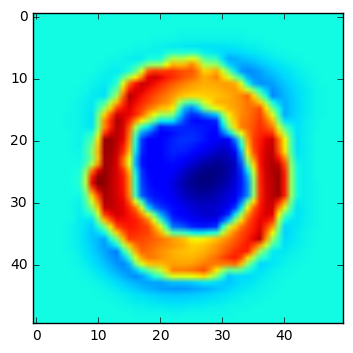

In [25]:
plt.imshow(imgs[1])

In [143]:
a = imgs.reshape(-1, 50,50,1)

In [144]:
a.flatten()

array([-0.00077375,  0.00020815,  0.00218485, ...,  0.002303  ,
        0.00275259,  0.00235993])

In [145]:
zeros = np.zeros(len(a.flatten())*3)
np.put(zeros, range(0, len(zeros), 3), a.flatten())

array([-0.00077375,  0.        ,  0.        , ...,  0.00235993,
        0.        ,  0.        ])

In [130]:
a=np.zeros((982,5)) 
b=np.random.randint(0,100,(491,5)) # your 491 row matrix
a[::2] = b
a.shape

(982, 5)

In [125]:
input = Input(shape=(50,50,1),name = 'image_input') 

#Use the generated model 
output_vgg16_conv = model_vgg16_conv(input)

#Add the fully-connected layers 
x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(10, activation='softmax', name='predictions')(x)

#Create your own model 
my_model = Model(inputs=input, outputs=x)

#In the summary, weights and layers from VGG part will be hidden, but they will be fit during the training
my_model.summary()

ValueError: number of input channels does not match corresponding dimension of filter, 1 != 3

In [179]:
my_model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy')

In [189]:
imgs.shape[0]

42000

In [186]:
my_model.fit(x = imgs, y = labels, epochs = 50, batch_size=256)

Epoch 1/50


ValueError: CorrMM images and kernel must have the same stack size

Apply node that caused the error: CorrMM{half, (1, 1), (1, 1)}(InplaceDimShuffle{0,3,1,2}.0, Subtensor{::, ::, ::int64, ::int64}.0)
Toposort index: 88
Inputs types: [TensorType(float32, 4D), TensorType(float32, 4D)]
Inputs shapes: [(256, 1, 50, 50), (64, 3, 3, 3)]
Inputs strides: [(10000, 10000, 200, 4), (4, 256, -2304, -768)]
Inputs values: ['not shown', 'not shown']
Outputs clients: [[Elemwise{Composite{(i0 * ((i1 + i2) + Abs((i1 + i2))))}}[(0, 1)](TensorConstant{(1, 1, 1, 1) of 0.5}, CorrMM{half, (1, 1), (1, 1)}.0, InplaceDimShuffle{x,0,x,x}.0)]]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "/Users/Vasilis/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/Vasilis/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-178-50b001c436b9>", line 4, in <module>
    output_vgg16_conv = model_vgg16_conv(input)
  File "/Users/Vasilis/anaconda3/lib/python3.5/site-packages/keras/engine/topology.py", line 585, in __call__
    output = self.call(inputs, **kwargs)
  File "/Users/Vasilis/anaconda3/lib/python3.5/site-packages/keras/engine/topology.py", line 2027, in call
    output_tensors, _, _ = self.run_internal_graph(inputs, masks)
  File "/Users/Vasilis/anaconda3/lib/python3.5/site-packages/keras/engine/topology.py", line 2178, in run_internal_graph
    output_tensors = _to_list(layer.call(computed_tensor, **kwargs))
  File "/Users/Vasilis/anaconda3/lib/python3.5/site-packages/keras/layers/convolutional.py", line 164, in call
    dilation_rate=self.dilation_rate)
  File "/Users/Vasilis/anaconda3/lib/python3.5/site-packages/keras/backend/theano_backend.py", line 1805, in conv2d
    filter_dilation=dilation_rate)

HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [ ]:
labe